## Случайные события. Вероятность события. Условная вероятность. Формула Байеса

### Задача 1

Подбрасываются три игральных кубика. Оцените вероятность того, что сумма значений этих кубиков не будет превышать 6.

Подсказка: оценкой вероятности может служить, например, относительная частота при большом числе опытов. Попробуйте реализовать наибольшее число опытов, которое позволяют ваш компьютер и/или ваше терпение.

In [1]:
import numpy as np

In [5]:
def dice_frequency(n):
    b = np.random.randint(1, 7, size=n)
    c = np.random.randint(1, 7, size=n)
    d = np.random.randint(1, 7, size=n)
    m = ((b + c + d) <= 6).sum()
    return m / n

In [6]:
from matplotlib import pyplot as plt
from tqdm.notebook import trange

plt.style.use('seaborn-whitegrid')

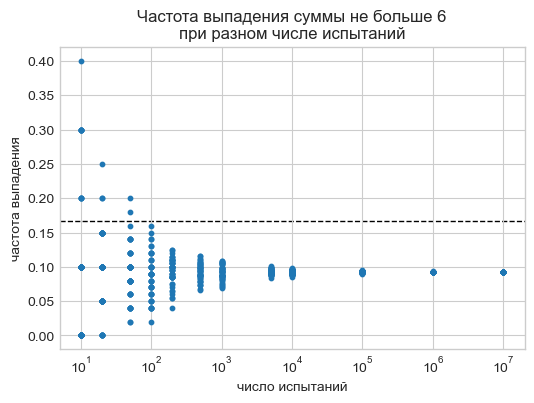

In [9]:
ns = [10, 20, 50, 100, 200, 500, 1000, 5000, 10 ** 4, 10 ** 5, 10 ** 6, 10 ** 7]

x = []
y = []

for _ in trange(50):
    for n in ns:
        x.append(n)
        y.append(dice_frequency(n))

plt.figure(dpi=100)

plt.scatter(x, y, s=10)
    
plt.axhline(y=1 / 6, c='black', ls='dashed', lw=1).set_zorder(0)
    
plt.xscale('log')

plt.title('Частота выпадения суммы не больше 6\nпри разном числе испытаний')
plt.xlabel('число испытаний')
plt.ylabel('частота выпадения')

plt.show()

### Задача 2

Имеется колода в 52 карты. Найти число возможностей вытянуть из неё 4 карты так, чтобы среди них был хотя бы один туз.

In [12]:
from math import factorial

def сombination (n, k):
    return int(factorial(n) / (factorial(k) * factorial(n - k)))

In [26]:
n = сombination(52, 4)
print(f'Общее число исходов: {n}')

Общее число исходов: 270725


In [27]:
m = сombination(4, 1) * сombination(51, 3)
print(f'Количество сочетаний из 4-х карт из которых 1 туз: {m}')

Количество сочетаний из 4-х карт из которых 1 туз: 83300


In [29]:
P = m / n
print(f'Вероятность вытянуть 4 карты с 1 тузом: {P:.5f}')

Вероятность вытянуть 4 карты с 1 тузом: 0.30769


### Задача 3

Из 60 вопросов, входящих в экзаменационные билеты, студент знает 50. Какова вероятность того, что среди трёх наугад выбранных вопросов студент знает: а) все? б) два?

##### а) студент знает все вопросы:

In [34]:
n = сombination(60, 3)
print(f'Общее число исходов: {n}')

Общее число исходов: 34220


Теперь необходимо найти количество исходов, в которых студент знает все три вопроса

In [35]:
m = сombination(50, 3)
m

19600

In [36]:
P = m / n
print(f'Вероятность того, что среди трёх наугад выбранных вопросов студент знает все: {P:.5f}')

Вероятность того, что среди трёх наугад выбранных вопросов студент знает все: 0.57276


##### б) студент знает все вопросы:

Найдём количество исходов, в которых студент знает только два вопроса из трёх выбранных

In [37]:
d = сombination(50, 2) * сombination(10, 1)
d

12250

In [38]:
P = d / n
print(f'Вероятность того, что среди трёх наугад выбранных вопросов студент знает 2: {P:.5f}')

Вероятность того, что среди трёх наугад выбранных вопросов студент знает 2: 0.35798


### Задача 4

Бросается игральная кость. Пусть событие A - появление чётного числа, событие B - появление числа больше трёх. Являются ли эти события независимыми?

#### События независимы если:
$$𝑃(𝐴𝐵)=𝑃(𝐴)⋅𝑃(𝐵)$$

Считаем что $P(A) = \dfrac{3}{6} = \dfrac{1}{2}$ - появление четного числа при бросании игральной кости(2, 4, 6).

$P(B) = \dfrac{3}{6} = \dfrac{1}{2}$ - появление числа больше трёх (4, 5, 6).

$P(AB) = \dfrac{2}{6} = \dfrac{1}{3}$ - выпадение чётного числа больше 3 (4, 6).

$События$ $зависимы$, так как не выполняется вышеприведенное условие: 
$ \dfrac{1}{3} = \dfrac{1}{2} \cdot \dfrac{1}{2}$

### Задача 5

Допустим, имеется некоторая очень редкая болезнь (поражает 0.1% населения). Вы приходите к врачу, вам делают тест на эту болезнь, и тест оказывается положительным. Врач говорит вам, что этот тест верно выявляет 99% больных этой болезнью и всего лишь в 1% случаев даёт ложный положительный ответ. 

Вопрос: какова вероятность, что вы действительно больны ей?

Подсказка: используйте формулу Байеса с раскрытием знаменателя с помощью формулы полной вероятности.

Формула Байеса:
$$P(B|A) = \dfrac{P(A|B) \cdot P(B)}{P(A)} = \dfrac{P(A|B) \cdot P(B)}{P(A|B) \cdot P(B) + P(A | \overline{B}) \cdot P(\overline{B})}$$ 

$P(A|B)$ - вероятность, что тест положительный и болен составляет 0.99

$P(B)$ - вероятность, что болен и составляет 0.001

$P(A | \overline{B})$ - вероятность, что тест даст ложный положительный результат и составляет 0.01

$P( \overline{B})$ - вероятность, что здоров 0.999

In [42]:
P = (0.99 * 0.001) / (0.99 * 0.001 + 0.01 * 0.999)
print(f'Вероятность, что вы действительно больны болезнью: {P*100:.4f}')

Вероятность, что вы действительно больны болезнью: 9.0164
